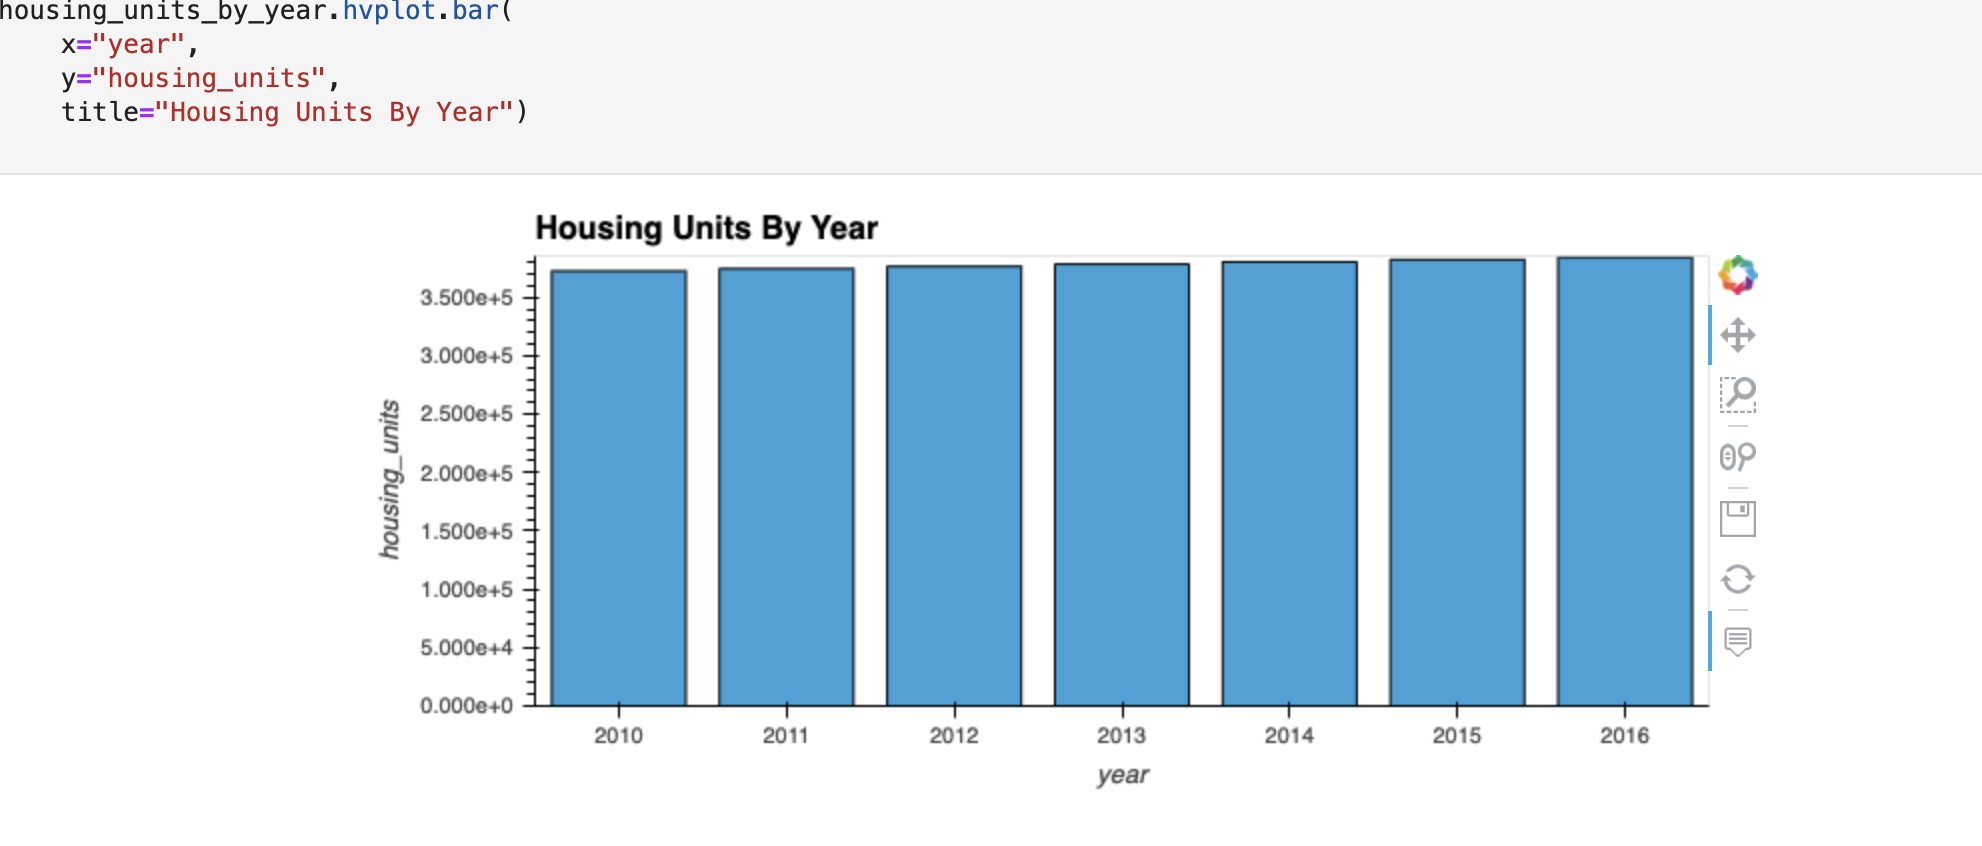# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualization skills, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

## Instructions

Use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

Note that this assignment requires you to create a visualization by using hvPlot and GeoViews. Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualize and analyze the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

### Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

### Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `geo` parameter to True.
    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `frame_width` parameter to 700.
    * Set the `frame_height` parameter to 500.
    * Include a descriptive title.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [10]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

## Import the data 

In [11]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(
    Path("./Resources/sfo_neighborhoods_census_data.csv")
)

# Review the first and last five rows of the DataFrame
sfo_data_df.head()


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [12]:
# Review the last five rows of the DataFrame
sfo_data_df.tail()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
396,2016,Westwood Park,631.195426,384242,4390


---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [13]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby("year").mean()
# Review the DataFrame
housing_units_by_year 

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

In [50]:
# Calculate the standard deviation of the housing_units_by_year dataframe.
std_dev_housing_units = housing_units_by_year["housing_units"].std()

In [51]:
# Calculate the minimun housing units of the housing_units_by_year dataframe.
min_housing = housing_units_by_year["housing_units"].min() - std_dev_housing_units

In [53]:
# Calculate the maximun housing units of the housing_units_by_year dataframe.
max_housing = housing_units_by_year["housing_units"].max()+ std_dev_housing_units

In [54]:
# Create a visual aggregation explore the housing units by year

housing_units_by_year.hvplot.bar(
    x="year",
    y="housing_units",
    ylim=(min_housing,max_housing),
    title="Housing Units By Year")


:Bars   [year]   (housing_units)

### Step 5: Answer the following question:

**Question:** What is the overall trend in housing_units over the period being analyzed?

**Answer:** From the above chart, we can tell that the housing units increases gradually over the period being analyzed.

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [15]:
# Create a numerical aggregation by grouping the data by year and averaging the results
prices_square_foot_by_year = sfo_data_df.groupby("year").mean()

# Review the resulting DataFrame
prices_square_foot_by_year 

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


**Question:** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer:** That's year 2010.

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [16]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = sfo_data_df.drop(columns = "housing_units")

# Review the DataFrame
prices_square_foot_by_year

,year,neighborhood,sale_price_sqr_foot,gross_rent
0,2010,Alamo Square,291.182945,1239
1,2010,Anza Vista,267.932583,1239
2,2010,Bayview,170.098665,1239
3,2010,Buena Vista Park,347.394919,1239
4,2010,Central Richmond,319.027623,1239
...,...,...,...,...
392,2016,Telegraph Hill,903.049771,4390
393,2016,Twin Peaks,970.085470,4390
394,2016,Van Ness/ Civic Center,552.602567,4390
395,2016,Visitacion Valley,328.319007,4390


### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [17]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
prices_square_foot_by_year.hvplot.line(
    x ="year",
    y =["sale_price_sqr_foot","gross_rent"],
    title="Prices per Square foor V. Gross Rent")

:NdOverlay   [Variable]
   :Curve   [year]   (value)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question:** Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer:** Yes. The drop happened in 2012,2014 and 2016.

**Question:** If so, did the gross rent increase or decrease during that year?

**Answer:** The gross rent increased during those years.

---

## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [18]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = sfo_data_df.groupby(["year", "neighborhood"]).mean()

# Review the DataFrame
prices_by_year_by_neighborhood 

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [19]:
# Filter out the housing_units
prices_by_year_by_neighborhood = sfo_data_df.drop(columns = "housing_units")

# Review the first and last five rows of the DataFrame
prices_by_year_by_neighborhood.head()



,year,neighborhood,sale_price_sqr_foot,gross_rent
0,2010,Alamo Square,291.182945,1239
1,2010,Anza Vista,267.932583,1239
2,2010,Bayview,170.098665,1239
3,2010,Buena Vista Park,347.394919,1239
4,2010,Central Richmond,319.027623,1239


In [20]:
prices_by_year_by_neighborhood.tail()


,year,neighborhood,sale_price_sqr_foot,gross_rent
392,2016,Telegraph Hill,903.049771,4390
393,2016,Twin Peaks,970.085470,4390
394,2016,Van Ness/ Civic Center,552.602567,4390
395,2016,Visitacion Valley,328.319007,4390
396,2016,Westwood Park,631.195426,4390


### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [56]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
prices_by_year_by_neighborhood.hvplot.line(
    x ="year",
    y =["sale_price_sqr_foot","gross_rent"],
    groupby="neighborhood",
    title="Prices per Square foor V. Gross Rent")

:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

### Step 6: Use the interactive visualization to answer the following question:

**Question:** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer:** The above plot shows that the average sale price per square foot for 2016 is less than the price that’s listed for 2012.

---

## Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?


### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [26]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv(
    Path("./Resources/neighborhoods_coordinates.csv"),
    index_col="Neighborhood"
)

# Review the DataFrame
neighborhood_locations_df 

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [69]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby("neighborhood").mean()
# Set "year"'s data type as int.
all_neighborhood_info_df["year"]=all_neighborhood_info_df["year"].astype(int)

# Review the resulting DataFrame
all_neighborhood_info_df

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013,366.020712,378401.00,2817.285714
Anza Vista,2013,373.382198,379050.00,3031.833333
Bayview,2012,204.588623,376454.00,2318.400000
Bayview Heights,2015,590.792839,382295.00,3739.000000
Bernal Heights,2013,576.746488,379374.50,3080.333333
...,...,...,...,...
West Portal,2012,498.488485,376940.75,2515.500000
Western Addition,2012,307.562201,377427.50,2555.166667
Westwood Highlands,2012,533.703935,376454.00,2250.500000


### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [31]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN,NaN


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Yerba Buena,37.79298,-122.39636,2012.5,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,2013.5,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,2013.0,391.434378,378401.0,2817.285714
Ingleside,NaN,NaN,2012.5,367.895144,377427.5,2509.000000
Outer Richmond,NaN,NaN,2013.0,473.900773,378401.0,2817.285714


In [32]:
# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()

# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,2012.833333,452.680591,378076.5,2698.833333


,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
68,West Portal,37.74026,-122.463880,2012.25,498.488485,376940.75,2515.500000
69,Western Addition,37.79298,-122.435790,2012.50,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.73470,-122.456854,2012.00,533.703935,376454.00,2250.500000
71,Westwood Park,37.73415,-122.457000,2015.00,687.087575,382295.00,3959.000000
72,Yerba Buena,37.79298,-122.396360,2012.50,576.709848,377427.50,2555.166667


In [78]:
all_neighborhoods_df.sort_values(by='gross_rent', ascending=False)

,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
71,Westwood Park,37.73415,-122.457000,2015.000000,687.087575,382295.00,3959.00
3,Bayview Heights,37.72874,-122.410980,2015.000000,590.792839,382295.00,3739.00
67,Visitacion Valley,37.72874,-122.410980,2014.500000,301.466180,381321.50,3657.00
59,Silver Terrace,37.73467,-122.401060,2014.000000,170.292549,380348.00,3528.00
36,Merced Heights,37.71993,-122.465950,2014.000000,788.844818,380348.00,3414.00
...,...,...,...,...,...,...,...
70,Westwood Highlands,37.73470,-122.456854,2012.000000,533.703935,376454.00,2250.50
38,Miraloma Park,37.73415,-122.457000,2011.750000,779.810842,375967.25,2155.25
60,South Beach,37.78323,-122.400650,2011.666667,650.124479,375805.00,2099.00
12,Diamond Heights,37.72863,-122.443050,2011.500000,434.991739,375480.50,2016.00


In [79]:
all_neighborhoods_df.sort_values(by='sale_price_sqr_foot', ascending=False)

,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
65,Union Square District,37.79101,-122.40210,2012.50,903.993258,377427.50,2555.166667
36,Merced Heights,37.71993,-122.46595,2014.00,788.844818,380348.00,3414.000000
38,Miraloma Park,37.73415,-122.45700,2011.75,779.810842,375967.25,2155.250000
51,Pacific Heights,37.79298,-122.43579,2013.00,689.555817,378401.00,2817.285714
71,Westwood Park,37.73415,-122.45700,2015.00,687.087575,382295.00,3959.000000
...,...,...,...,...,...,...,...
67,Visitacion Valley,37.72874,-122.41098,2014.50,301.466180,381321.50,3657.000000
47,Outer Mission,37.72280,-122.43869,2013.50,242.370952,379374.50,2995.750000
2,Bayview,37.73467,-122.40106,2012.00,204.588623,376454.00,2318.400000
24,Hunters Point,37.72551,-122.37178,2012.50,170.624920,377427.50,2489.000000


### Step 4: Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

* Set the `geo` parameter to True.
* Set the `size` parameter to “sale_price_sqr_foot”.
* Set the `color` parameter to “gross_rent”.
* Set the `frame_width` parameter to 700.
* Set the `frame_height` parameter to 500.
* Include a descriptive title.

In [77]:
# Create a plot to analyze neighborhood info
all_neighborhoods_df.hvplot.points(
    "Lon",
    "Lat",
    geo=True,
    size='sale_price_sqr_foot',
    color='gross_rent',
    hover_cols='all',
    title ='SFO Neighborhood Map',
    hover_name="Neighborhood",
    frame_width=700,
    frame_height=500,
    size_max=25,
    zoom=11,
    tiles="OSM" 
    )

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (gross_rent,sale_price_sqr_foot,index,Neighborhood,year,housing_units)

### Step 5: Use the interactive map to answer the following question:

**Question:** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer:** Westwood Park has the highest gross rent and Union square district has the highest sale price per square foot.

## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

**Question:**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer:** # The trend in rental income growth is increasing gradually during 2010 t0 2016 in all the neighborhoods across San Francisco  and the trend in sales prices is decreasing in most of the neighborhoods across San Francisco.

**Question:** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

**Answer:** As to the one-click, buy-and-rent strategy, I will recommend investing in the high rental income neighborhoods with low sale price per foot.Because these areas give the higher return rate of the investment. Such as, Silver Terrace and Visitacion Valley.